In [20]:
import os
import sys
import numpy as np
#import scipy.io
#import scipy.misc
#import tensorflow as tf  # Import TensorFlow after Scipy or Scipy will break
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
from PIL import Image
%matplotlib inline
import random

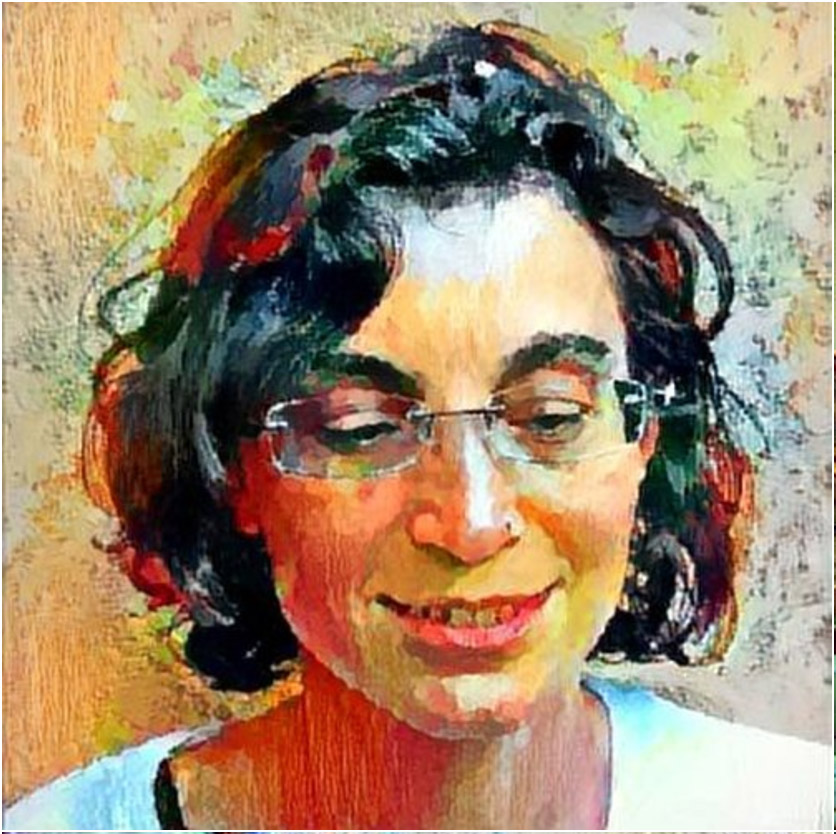

In [215]:
CONTENT = 'images/gurney.jpg'

image2 = Image.open(CONTENT)
image2

In [117]:
def dominating_colour(CONTENT):
    image = Image.open(CONTENT)
    w, h = image.size
    pixels = image.getcolors(w * h)

    most_frequent_pixel = pixels[0]

    for count, colour in pixels:
        if count > most_frequent_pixel[0]:
            most_frequent_pixel = (count, colour)

    #compare("Most Common", image, most_frequent_pixel[1])
    colour_tuple = [None, None, None]
    for channel in range(3):

          # Get data for one channel at a time
          pixels = image.getdata(band=channel)

          values = []
          for pixel in pixels:
              values.append(pixel)

          colour_tuple[channel] = sum(values) / len(values)
    p = list(most_frequent_pixel[1])
    m = [0,0,0]
    for i in range(0,3):
        m[i] = (max(p[i], colour_tuple[i]))
    return m
            
            
            

In [118]:
print(dominating_colour('images/baby.png'))

[104.41130447387695, 129.1599235534668, 156.58757400512695]


In [261]:
def happy_generator():
    x = [0,0,0]
    for i in range(3):
        x[i] = random.randrange(28,200)
    
    return x

print(happy_generator())

def sad_generator():
    x = [0,0,0]
    x[0] = random.randrange(180,255) 
    x[1] = random.randrange(150,255) 
    x[2] = random.randrange(130,255) 
    
    
    return x
print(sad_generator()) 
        


[175, 97, 94]
[181, 150, 227]


82 67 156
168 184 90


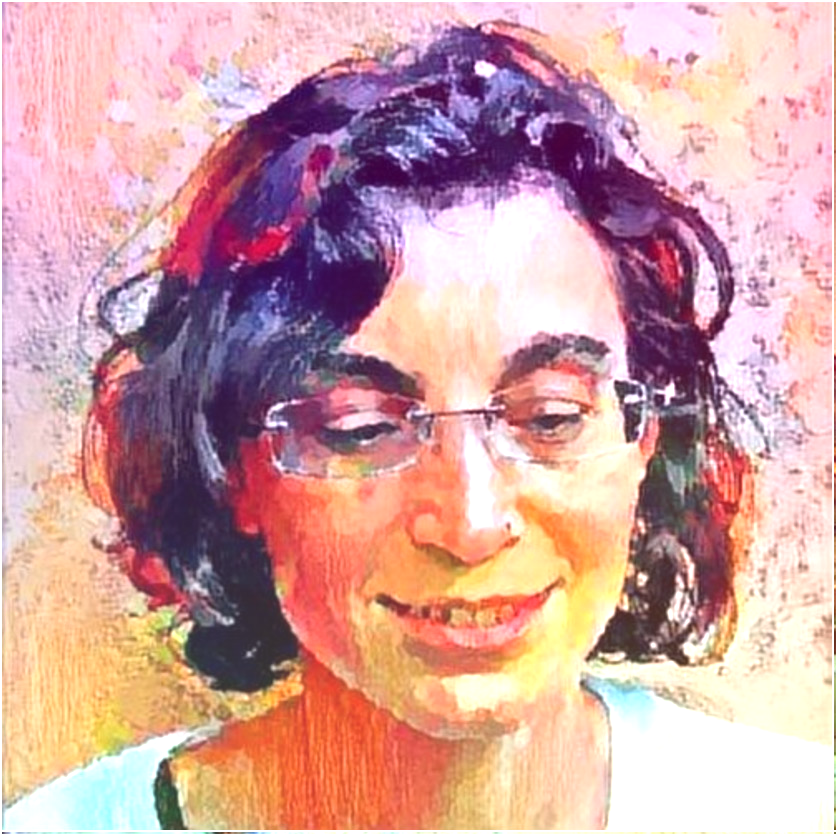

In [228]:
#CONTENT = 'images/ronaldo.jpg'
#CONTENT = 'images/baby.png'
CONTENT = 'images/gurney.jpg'
#CONTENT = 'images/kiddo.jpg'
a,b,c = dominating_colour(CONTENT)
d,e,f = happy_generator()
print(d,e,f)
image2 = Image.open(CONTENT)
pixels = image2.load()
print(int(abs(d-a)),int(abs(b-e)),int(abs(f-c)))
for i in range(image2.size[0]):    # for every col:
    for j in range(image2.size[1]):# For every row
        lst = list(pixels[i,j])
        lst[0] += int(abs(d-a/6+i/20))
        lst[1] += int(abs(b/5-e/2-j/10))
        lst[2] += int(abs(f-c + (i+j)/24))
        pixels[i,j] = tuple(lst)
        #pixels[i,j] = (i,j,100)


        
image2

In [243]:
from PIL import ImageEnhance

212 182 214
38 69 32


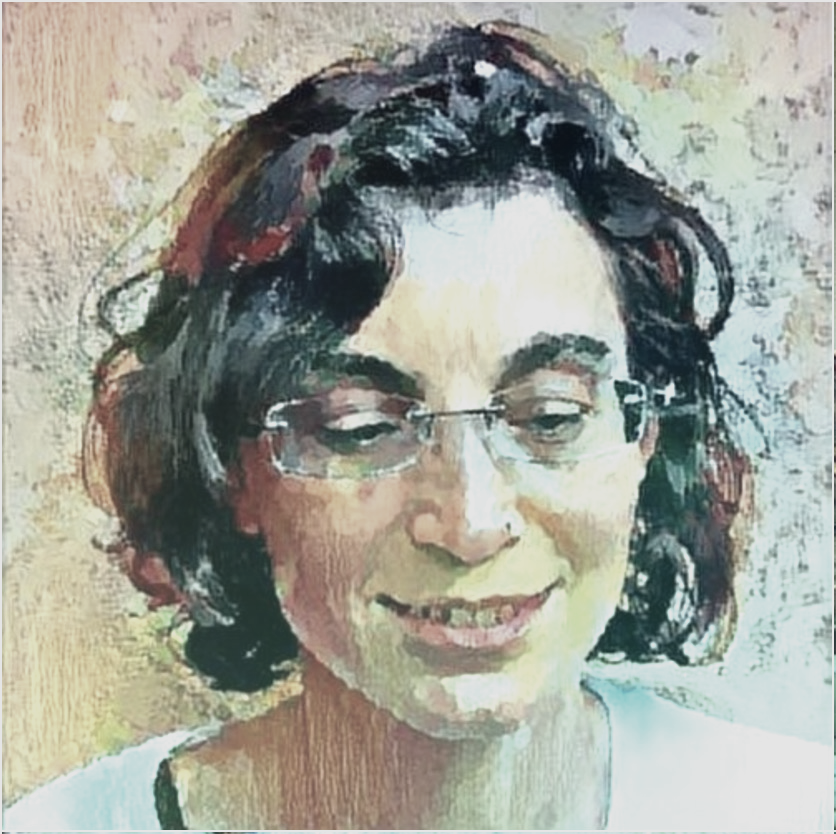

In [281]:
#CONTENT = 'images/ronaldo.jpg'
#CONTENT = 'images/baby.png'
CONTENT = 'images/gurney.jpg'
#CONTENT = 'images/kiddo.jpg'
a,b,c = dominating_colour(CONTENT)
d,e,f = sad_generator()

print(d,e,f)
image2 = Image.open(CONTENT)
pixels = image2.load()
print(int(abs(d-a)),int(abs(b-e)),int(abs(f-c)))
for i in range(image2.size[0]):    # for every col:
    for j in range(image2.size[1]):# For every row
        lst = list(pixels[i,j])
        lst[0] += int(abs(d/5-a/3+i/15))
        lst[1] += int(abs(b/5-e/3-j/10))
        lst[2] += int(abs(f/2-c/3 + (i/2+j)/24))
        pixels[i,j] = tuple(lst)
        #pixels[i,j] = (i,j,100)/
        
check = ImageEnhance.Color(image2).enhance(0.4)
check2 = ImageEnhance.Brightness(check).enhance(0.9)


check2